In [8]:
%load_ext autoreload
%autoreload 2

import sys
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display

sys.path.append('../Runs')
from train_QTable import optimal_strategy, run
# from helper.Q_learning import QLearn, round_custombase
from helper.manage_orderbooks import OrderbookEpisodesGenerator, plot_episode
from helper.orderbook_trader import OrderbookTradingSimulator
from agents.QTable_Agent import QTable_Agent

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
inputfile='/home/axel/data/small/obs_2016-11_USDT_BTC_maxVol100.dict'
# experiment_name='1611_USDTBTC_Qtable_100vol10_60T4___1datapoint'
# outputfolder='experiments'
# outputfile_model=os.path.join(outputfolder, experiment_name, 'model', experiment_name)
outputfile_model='q_10_aggr.json'
volume=100
volume_intervals=10
decision_points=4
period_length=15
action_min=-0.4
action_max=1.0
action_count=15

state_variables=['volume','time']
actions = list(np.linspace(action_min, action_max, num=action_count))

episodes_train = OrderbookEpisodesGenerator(filename=inputfile,
                                            episode_length=decision_points*period_length)
# data = list(episodes_train[:20])
# pickle.dump( data, open( "cached_episodes.p", "wb" ) )
data = pickle.load( open( "cached_episodes.p", "rb" ) )
print(data[0][0].timestamp)

agent = optimal_strategy(traingdata=data[:10], V=volume, T=decision_points,
                          period_length=period_length, vol_intervals=volume_intervals,
                          actions=actions, state_variables=state_variables,
                          outputfile=outputfile_model)

  0%|          | 0/4 [00:00<?, ?it/s]
0it [00:00, ?it/s]

2016-11-08T10:00
RL-Type: <class 'agents.QTable_Agent.QTable_Agent'>



1it [00:21, 21.77s/it]

Saved: 'q_10_aggr.json'



2it [00:44, 22.14s/it]
3it [01:13, 24.15s/it]
4it [01:45, 26.43s/it]
5it [02:15, 27.64s/it]
6it [02:46, 28.54s/it]

Saved: 'q_10_aggr.json'



7it [03:10, 27.08s/it]
8it [03:39, 27.89s/it]
9it [04:06, 27.53s/it]
10it [04:34, 27.60s/it]
 25%|██▌       | 1/4 [04:34<13:43, 274.37s/it]
0it [00:00, ?it/s]
1it [00:23, 23.60s/it]

Saved: 'q_10_aggr.json'



2it [00:48, 23.88s/it]
3it [01:12, 24.07s/it]
4it [01:43, 26.14s/it]
5it [02:13, 27.32s/it]
6it [02:44, 28.25s/it]

Saved: 'q_10_aggr.json'



7it [03:02, 25.44s/it]
8it [03:26, 24.80s/it]
9it [03:54, 25.89s/it]
10it [04:19, 25.47s/it]
 50%|█████     | 2/4 [08:53<08:59, 269.83s/it]
0it [00:00, ?it/s]
1it [00:24, 24.25s/it]

Saved: 'q_10_aggr.json'



2it [00:53, 25.82s/it]
3it [01:18, 25.45s/it]
4it [01:48, 26.91s/it]
5it [02:19, 28.02s/it]
6it [02:49, 28.62s/it]

Saved: 'q_10_aggr.json'



7it [03:10, 26.46s/it]
8it [03:35, 25.83s/it]
9it [04:01, 25.99s/it]
10it [04:27, 26.04s/it]
 75%|███████▌  | 3/4 [13:21<04:29, 269.15s/it]
0it [00:00, ?it/s]
1it [00:03,  3.26s/it]

Saved: 'q_10_aggr.json'



2it [00:06,  3.17s/it]
3it [00:10,  3.37s/it]
4it [00:13,  3.41s/it]
5it [00:17,  3.45s/it]
6it [00:20,  3.45s/it]

Saved: 'q_10_aggr.json'



7it [00:24,  3.55s/it]
8it [00:27,  3.54s/it]
9it [00:31,  3.49s/it]
10it [00:34,  3.36s/it]
100%|██████████| 4/4 [13:55<00:00, 198.70s/it]


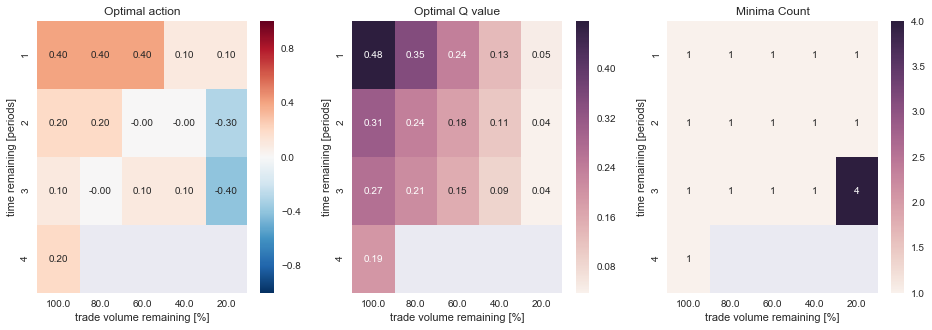

In [34]:
agent.heatmap_Q(show_minima_count=True)

In [19]:
models = ['q_10.json', 'q_10_aggr.json', 'q_10_interp.json', 'q_5.json', 'q_5_interp.json']
costs_insample = None
for m, file in enumerate(models):
    agent = QTable_Agent.load(file)
    print(m, file[:-5])
    if m < len(models)-1:
        costs_insample = agent.evaluate(testdata=data[:10], name=file[:-5], verbose=False, costs=costs_insample)
    else:
        costs_insample = agent.evaluate(testdata=data[:10], name=file[:-5], verbose=False, costs=costs_insample, evaluate_actions=[0.1, 0.2, 0.3, 0.4, 0.5])

display(costs_insample)
display(costs_insample.mean())
best_static_action = costs_insample.mean()[len(models):].argmin()
print("Best S&L action: {}".format(best_static_action))

0it [00:00, ?it/s]

0 q_10


10it [00:11,  1.24s/it]
0it [00:00, ?it/s]

1 q_10_aggr


10it [00:11,  1.07s/it]
0it [00:00, ?it/s]

2 q_10_interp


10it [00:11,  1.24s/it]
0it [00:00, ?it/s]

3 q_5


10it [00:11,  1.28s/it]
0it [00:00, ?it/s]

4 q_5_interp


10it [00:39,  3.96s/it]


,q_10,q_10_aggr,q_10_interp,q_5,q_5_interp,0.1,0.2,0.3,0.4,0.5
2016-11-08T10:00,0.110232,0.087224,0.110232,0.110232,0.110232,0.049678,0.059681,0.137018,0.138138,0.172375
2016-11-08T11:01,0.155489,0.134834,0.155489,0.155489,0.155489,0.176842,0.140272,0.155865,0.158204,0.164635
2016-11-08T12:01,0.150561,0.136864,0.150561,0.150561,0.150256,0.133935,0.150561,0.178832,0.268433,0.331701
2016-11-08T13:01,0.398148,0.497752,0.398148,0.356376,0.433150,0.810445,0.588051,0.365504,0.332559,0.323354
2016-11-08T14:01,0.652220,0.645018,0.652220,0.652220,0.652220,0.989231,0.965241,0.938127,0.779126,0.666810
2016-11-08T15:01,0.284722,0.336545,0.470262,0.284406,0.470262,1.033798,0.544775,0.421725,0.262630,0.270675
2016-11-08T16:01,0.004916,0.049403,0.004916,-0.012960,0.002662,0.076710,0.119553,0.132024,0.164117,0.181639
2016-11-08T17:01,0.289527,0.363018,0.289527,0.321914,0.321914,0.718140,0.667368,0.286736,0.334411,0.359260
2016-11-08T18:01,0.338044,0.387262,0.338044,0.338044,0.338044,0.778130,0.776488,0.554358,0.322197,0.369889
2016-11-08T19:01,0.275279,0.269125,0.275723,0.275723,0.275740,0.818112,0.241804,0.279468,0.288832,0.299864


q_10           0.265914
q_10_aggr      0.290704
q_10_interp    0.284512
q_5            0.263200
q_5_interp     0.290997
0.1            0.558502
0.2            0.425379
0.3            0.344966
0.4            0.304865
0.5            0.314020
dtype: float64

Best S&L action: 0.4


0 q_10


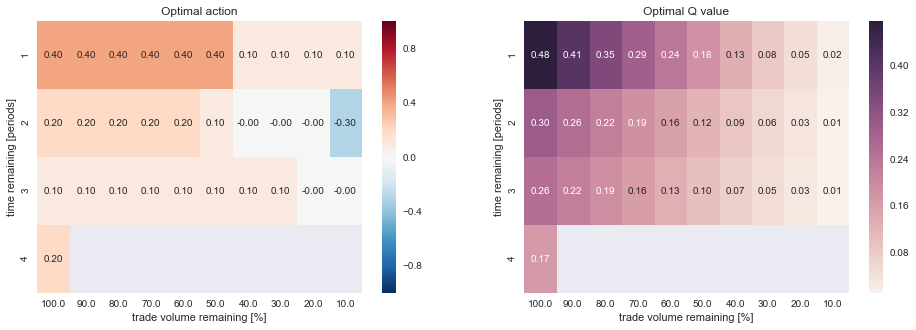

10it [00:13,  1.46s/it]


1 q_10_aggr


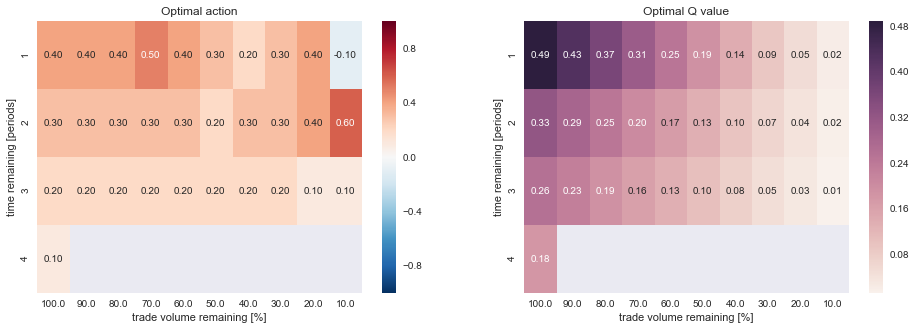

10it [00:12,  1.28s/it]


2 q_10_interp


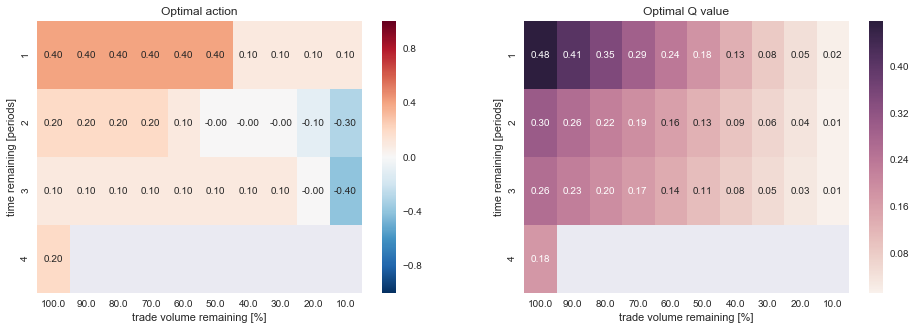

10it [00:13,  1.44s/it]


3 q_5


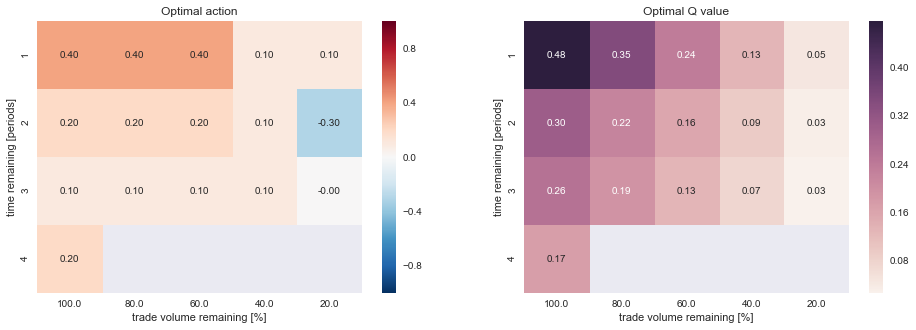

10it [00:13,  1.44s/it]


4 q_5_interp


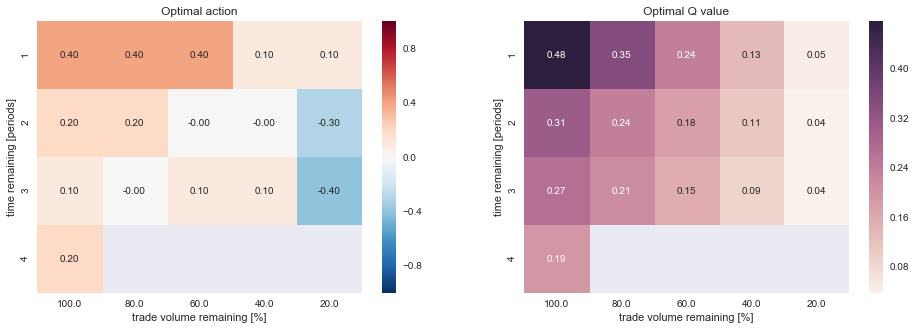

10it [00:19,  2.03s/it]


,q_10,q_10_aggr,q_10_interp,q_5,q_5_interp,0.4
2016-11-08T20:01,0.167956,0.160430,0.149878,0.156889,0.143272,0.218356
2016-11-08T21:01,0.270768,0.262061,0.270768,0.270768,0.231395,0.293760
2016-11-08T22:01,0.123876,0.100878,0.123876,0.123876,0.123876,0.130666
2016-11-08T23:01,0.207011,0.224915,0.205186,0.205186,0.205186,0.253480
2016-11-09T00:01,0.151547,0.183448,0.167425,0.189463,0.189465,0.211489
2016-11-09T01:01,0.342651,0.345492,0.342651,0.298785,0.298785,0.382596
2016-11-09T02:01,0.082392,0.058044,0.082392,0.082392,0.082392,0.082392
2016-11-09T03:01,0.394625,0.579077,0.547654,0.547654,0.547654,0.374530
2016-11-09T04:01,1.813662,1.886573,1.813662,1.813662,1.813662,2.102771
2016-11-09T05:01,0.052634,0.016260,0.057873,0.052634,0.057873,0.023436


q_10           0.360712
q_10_aggr      0.381718
q_10_interp    0.376136
q_5            0.374131
q_5_interp     0.369356
0.4            0.407348
dtype: float64

Best S&L action: 0.4


In [22]:
models = ['q_10.json', 'q_10_aggr.json', 'q_10_interp.json', 'q_5.json', 'q_5_interp.json']
costs = None
for m, file in enumerate(models):
    agent = QTable_Agent.load(file)
    print(m, file[:-5])
    agent.heatmap_Q()
    if m < len(models)-1:
        costs = agent.evaluate(testdata=data[10:20], name=file[:-5], verbose=False, costs=costs)
    else:
        costs = agent.evaluate(testdata=data[10:20], name=file[:-5], verbose=False, costs=costs, evaluate_actions=[best_static_action])

display(costs)
display(costs.mean())
print("Best S&L action: {}".format(best_static_action))

In [ ]:
costs_insample = agent.evaluate(testdata=data[:10], verbose=False, costs=costs_insample, name='v10')  # , evaluate_actions=[0.1, 0.2, 0.3, 0.4, 0.5])

display(costs_insample)
display(costs_insample.mean())
best_static_action = costs_insample.mean()[2:].argmin()
print("Best S&L action: {}".format(best_static_action))

In [ ]:
#costs = None
costs = agent.evaluate(testdata=data[10:20], verbose=False, name='v10', costs=costs)  # , evaluate_actions=[best_static_action])

display(costs)
display(costs.mean())

In [ ]:
idx = 4
plot_episode(data[idx], volume=100, limits=[0.2])
plot_episode(data[idx], volume=100, limits=[0.4]*4, intervals=5)

In [ ]:
display(costs.iloc[:8,:])
display(costs.iloc[:8,:].mean())

10 samples  
2016-11-08T10:00 - 2016-11-08T19:01


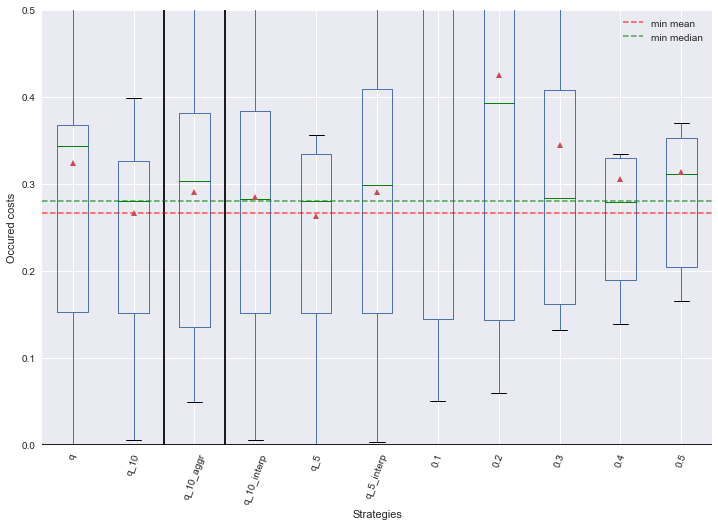

In [15]:

plot_experiment_results(costs_insample.iloc[:,:], showfliers=True, hline='q_10', ylim=(0, 0.5))

In [ ]:
plot_experiment_results(costs.iloc[:8,:], showfliers=True, hline='v10_interp')